In [362]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import chi2_contingency
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import cross_val_score

In [363]:
# Citirea datelor
def load_data(filepath):
    return pd.read_csv(filepath, na_values=' ')

# Explorare inițială
def explore_data(df):
    print(df.describe())  # Statistici pentru atribute numerice
    print(df.info())      # Info general, inclusiv date lipsă

# Funcția pentru extragerea statisticilor pentru atribute numerice continue
def extract_numerical_statistics(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    stats = []

    for feature in numerical_features:
        no_missing = df[feature].notna().sum()
        mean = df[feature].mean()
        std_dev = df[feature].std()
        min_value = df[feature].min()
        percentile_25 = df[feature].quantile(0.25)
        median = df[feature].median()
        percentile_75 = df[feature].quantile(0.75)
        max_value = df[feature].max()
        
        stats.append({
            'Atribut': feature,
            'Număr exemple fără valori lipsă': no_missing,
            'Valoarea medie': mean,
            'Deviația standard': std_dev,
            'Valoarea minimă': min_value,
            'Percentila 25%': percentile_25,
            'Percentila 50% (Mediana)': median,
            'Percentila 75%': percentile_75,
            'Valoarea maximă': max_value
        })
    
    return pd.DataFrame(stats)

# Funcția pentru extragerea statisticilor pentru atribute discrete și ordinale
def extract_categorical_statistics(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    stats = []

    for feature in categorical_features:
        no_missing = df[feature].notna().sum()
        unique_values = df[feature].nunique()
        
        stats.append({
            'Atribut': feature,
            'Număr exemple fără valori lipsă': no_missing,
            'Număr valori unice': unique_values
        })
    
    return pd.DataFrame(stats)


# Funcția pentru afișarea boxplot-urilor pentru atributele numerice continue
def plot_boxplots(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    for feature in numerical_features:
        sns.boxplot(x=df[feature])
        plt.title(f'Boxplot pentru {feature}')
        plt.show()

# Funcția pentru afișarea histogramelor pentru atributele discrete și ordinale
def plot_histograms(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    for feature in categorical_features:
        df[feature].value_counts().plot(kind='bar')
        plt.title(f'Histogramă pentru {feature}')
        plt.show()


def plot_class_balance(df, target_column):
    sns.countplot(x=df[target_column])
    plt.show()

# Funcția pentru verificarea corelației între atributele numerice
def check_numerical_correlations(df):
    numerical_features = df.select_dtypes(include=[np.number]).columns
    correlation_matrix = df[numerical_features].corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matricea de corelație pentru atributele numerice')
    plt.show()

# Funcția pentru calcularea coeficientului Cramér's V
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    phi2 = chi2/n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# Funcția pentru verificarea corelației între atributele categorice
def check_categorical_correlations(df):
    categorical_features = df.select_dtypes(include=['object', 'category']).columns
    correlation_matrix = pd.DataFrame(index=categorical_features, columns=categorical_features)

    for col1 in categorical_features:
        for col2 in categorical_features:
            correlation_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

    correlation_matrix = correlation_matrix.astype(float)

    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Matricea de corelație pentru atributele categorice')
    plt.show()

In [364]:
# Încărcarea datelor
train_path = './tema2_AVC/AVC_train.csv'
test_path = './tema2_AVC/AVC_test.csv'
train_data = load_data(train_path)
test_data = load_data(test_path)

train_path_2 = './tema2_Credit_Risk/credit_risk_train.csv'
test_path_2 = './tema2_Credit_Risk/credit_risk_test.csv'
train_data_2 = load_data(train_path_2)
test_data_2 = load_data(test_path_2)

                    Atribut  Număr exemple fără valori lipsă  Valoarea medie  \
0    mean_blood_sugar_level                             4088      105.631416   
1     cardiovascular_issues                             4088        0.053816   
2       body_mass_indicator                             3887       28.891227   
3       high_blood_pressure                             4088        0.096135   
4                 years_old                             4088       46.604217   
5             chaotic_sleep                             4088        0.053816   
6          analysis_results                             3577      322.332570   
7      biological_age_index                             4088      135.314474   
8  cerebrovascular_accident                             4088        0.042564   

   Deviația standard  Valoarea minimă  Percentila 25%  \
0          44.770689        55.120000       76.990000   
1           0.225682         0.000000        0.000000   
2           7.810377        

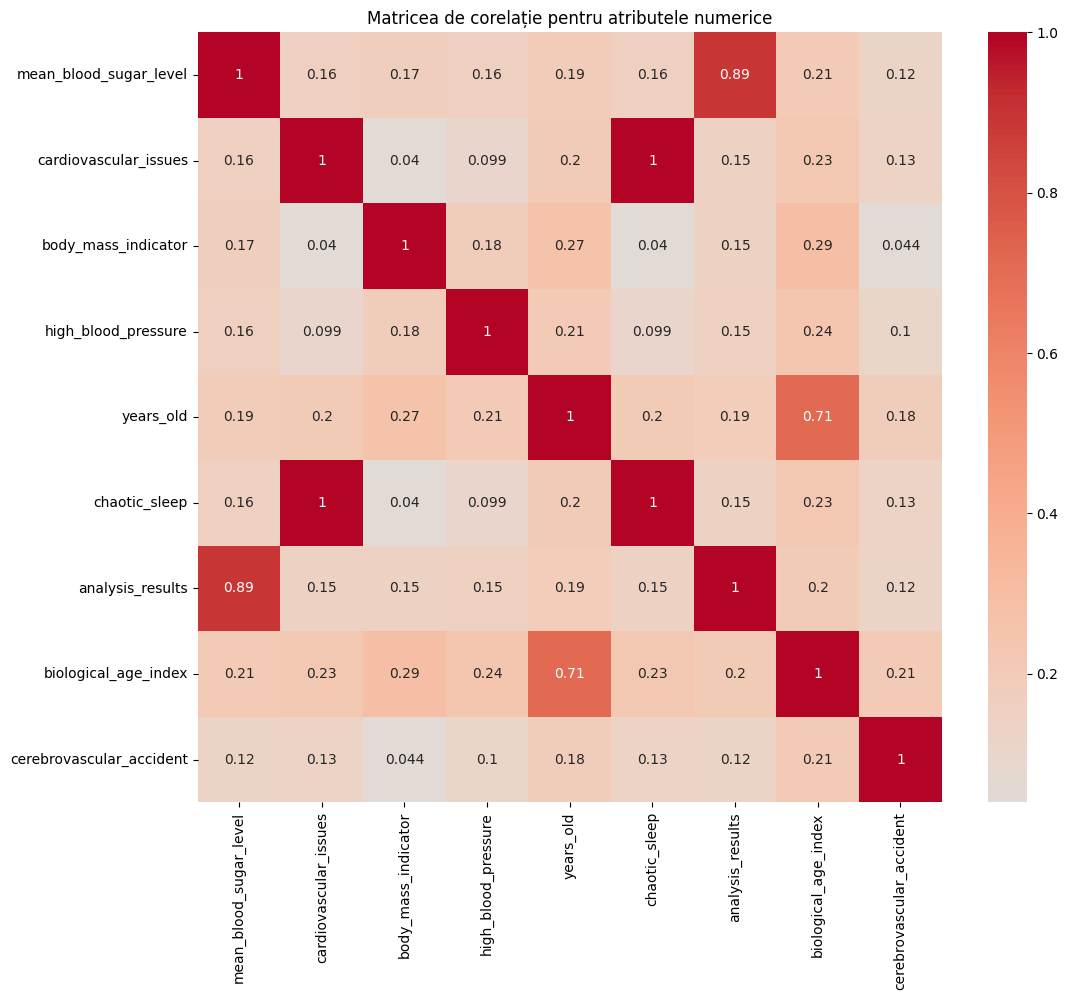

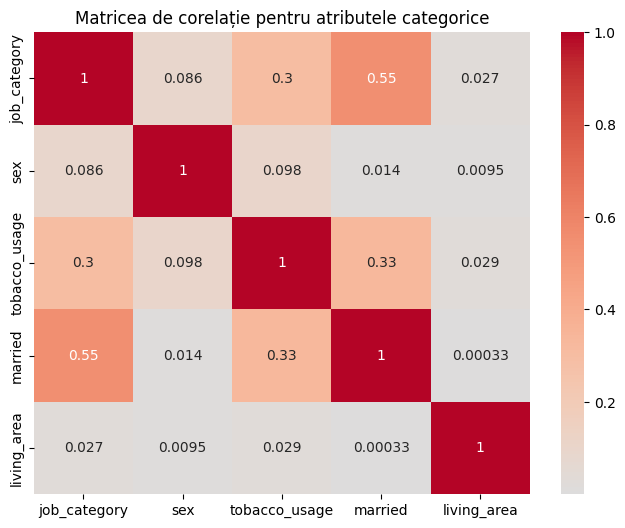

In [365]:
# Extragerea statisticilor pentru atributele numerice continue
# train_data = train_data_2
numerical_stats = extract_numerical_statistics(train_data)
print(numerical_stats)

# Extragerea statisticilor pentru atributele discrete și ordinale
categorical_stats = extract_categorical_statistics(train_data)
print(categorical_stats)

# Afișarea boxplot-urilor pentru atributele numerice continue
# plot_boxplots(train_data)

# Afișarea histogramelor pentru atributele discrete și ordinale
# plot_histograms(train_data)

# Analiza echilibrului de clase
# for target_column in train_data.columns:
#     plot_class_balance(train_data, target_column)
    
# Verificarea corelațiilor între atributele numerice
check_numerical_correlations(train_data)

# Verificarea corelațiilor între atributele categorice
check_categorical_correlations(train_data)

In [366]:
# Standardizare
def standardize_data(df, columns):
    scaler = StandardScaler()
    df[columns] = scaler.fit_transform(df[columns])
    return df



# Codificare pentru variabile categorice
def encode_data(df, column):
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    return df, encoder

In [367]:
# Preprocesare

# Impute missing values with the mean for numeric columns
numeric_columns = train_data.select_dtypes(include=np.number).columns
train_data[numeric_columns] = train_data[numeric_columns].fillna(train_data[numeric_columns].mean())
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].mean())

# Impute missing values for non-numeric columns (if any)
non_numeric_columns = train_data.select_dtypes(exclude=np.number).columns
train_data[non_numeric_columns] = train_data[non_numeric_columns].fillna(train_data[non_numeric_columns].mode().iloc[0])
test_data[non_numeric_columns] = test_data[non_numeric_columns].fillna(test_data[non_numeric_columns].mode().iloc[0])


# Identificarea valorilor extreme numerice și înlocuirea cu media
for column in numeric_columns:
    mean = train_data[column].mean()
    std = train_data[column].std()
    z_scores = (train_data[column] - mean) / std
    threshold = 3
    outliers = np.abs(z_scores) > threshold
    print(mean)
    train_data.loc[outliers, column] = train_data[column].mean()
    print(f"Număr de valori extreme înlocuite pentru {column}: {outliers.sum()}")



    
# Encode categorical variables
encoder = LabelEncoder()
for column in non_numeric_columns:
    train_data[column] = encoder.fit_transform(train_data[column])
    test_data[column] = encoder.transform(test_data[column])
    
# Oversample minority class to handle class imbalance
X_train = train_data.drop('cerebrovascular_accident', axis=1)
y_train = train_data['cerebrovascular_accident']
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


Număr de valori extreme înlocuite pentru mean_blood_sugar_level: 44
Număr de valori extreme înlocuite pentru cardiovascular_issues: 220
Număr de valori extreme înlocuite pentru body_mass_indicator: 47
Număr de valori extreme înlocuite pentru high_blood_pressure: 393
Număr de valori extreme înlocuite pentru years_old: 45
Număr de valori extreme înlocuite pentru chaotic_sleep: 220
Număr de valori extreme înlocuite pentru analysis_results: 51
Număr de valori extreme înlocuite pentru biological_age_index: 0
Număr de valori extreme înlocuite pentru cerebrovascular_accident: 174


/tmp/ipykernel_3402/3688602190.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.053816046966731895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[outliers, column] = train_data[column].mean()
/tmp/ipykernel_3402/3688602190.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.09613502935420744' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[outliers, column] = train_data[column].mean()
/tmp/ipykernel_3402/3688602190.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.053816046966731895' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[outliers, column] = train_data

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Model Evaluation
def evaluate_model(clf, X_test, y_test):
    predictions = clf.predict(X_test)
    print(classification_report(y_test, predictions))
    print(confusion_matrix(y_test, predictions))


# Split data into train and test sets
clf = DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)  
clf.fit(X_resampled, y_resampled)

# Evaluate model on test data
X_test = test_data.drop('cerebrovascular_accident', axis=1)
y_test = test_data['cerebrovascular_accident']
evaluate_model(clf, X_test, y_test)

# Cross-validation on resampled data
cv_scores = cross_val_score(clf, X_resampled, y_resampled, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       947
           1       0.15      0.31      0.20        75

    accuracy                           0.82      1022
   macro avg       0.54      0.58      0.55      1022
weighted avg       0.88      0.82      0.85      1022

[[816 131]
 [ 52  23]]
Cross-validation scores: [0.8633461  0.89846743 0.89144317 0.89776358 0.89073482]
Mean CV accuracy: 0.8883510215073507


In [ ]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Model Training
# mlp_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
# mlp_clf.fit(X_train_scaled, y_train)

# # Model Evaluation
# evaluate_model(mlp_clf, X_test_scaled, y_test)

# # Cross-validation

# cv_scores = cross_val_score(mlp_clf, X_resampled, y_resampled, cv=5)
# print("Cross-validation scores:", cv_scores)
# print("Mean CV accuracy:", np.mean(cv_scores))